**RNN**

---



*Let's write a simple Recurrent Neural Network* 

h(t) = ReLU( W_x2h * x(t) + W_h2h * h(t-1) + bh )

y(t) = W_h2y * h(t) + by


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class myRNN(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super().__init__()

    self.hidden_dim = hidden_dim

    self.W_x2h = nn.Linear(input_dim,hidden_dim,bias=True)
    self.W_h2h = nn.Linear(hidden_dim,hidden_dim,bias=False)
    self.W_h2y = nn.Linear(hidden_dim,output_dim,bias=True)
  
  # input is of size (batch_size, sequence_length, input_dim)
  def forward(self,input):
    # Calculate hidden state for each sample in the batch
    h = torch.zeros((input.size(0),self.hidden_dim))
    
    # Go over the sequence 
    for t in range(input.size(1)):
      h = F.relu( self.W_x2h(input[:,t]) + self.W_h2h(h) )
      # Not calculating intermediate outputs

    pred = self.W_h2y(h)
    # return the final output and h
    return pred, h


In [ ]:
model = myRNN(4,10,2) #(input_dim, hidden_dim, output_dim)

input = torch.randn(3,100,4) #(batch_size,sequence_length,input_dim)

print("Input shape at an instant: ",input[:,0].shape) #(batch_size,input_dim)

y,h = model(input)
print("Output shape: ",y.shape)
print("Hidden state shape: ",h.shape)

# You can print the weights
print(model.W_x2h.weight)
print(model.W_x2h.bias)

Input shape at an instant:  torch.Size([3, 4])
Output shape:  torch.Size([3, 2])
Hidden state shape:  torch.Size([3, 10])
Parameter containing:
tensor([[-0.2516, -0.3671, -0.4503, -0.4574],
        [-0.1533, -0.0220, -0.1818,  0.1413],
        [-0.3212, -0.0737, -0.2321,  0.1000],
        [ 0.0753,  0.4919,  0.0258, -0.4502],
        [ 0.3789,  0.3049,  0.2985, -0.2996],
        [ 0.1580,  0.2725,  0.2905, -0.0768],
        [ 0.3198, -0.2491, -0.0467,  0.0184],
        [-0.2630, -0.4797,  0.4717, -0.2109],
        [ 0.4960,  0.0465,  0.3575, -0.3474],
        [ 0.0431,  0.3900, -0.2475,  0.1863]], requires_grad=True)
Parameter containing:
tensor([ 0.3886,  0.3981,  0.0140,  0.2495,  0.0078, -0.4428,  0.2828,  0.1145,
         0.0750,  0.0117], requires_grad=True)


*Let's now use nn.RNN*

*The output of nn.RNN is hidden state values at all time steps. It is of size (batch_size, sequence_length, hidden_size x num_directions) if batch_first=True; otherwise, (sequence_length, batch_size, num_directions * hidden_size)*

*num_directions is 2 for bidirectional RNN, where the data is input in the reverse order to a secondary network.* 


In [ ]:
rnn_model = nn.RNN(input_size=4, hidden_size=10, num_layers=1, batch_first=True)

print(rnn_model)

print('# Print the initial input-to-hidden weights and biases')
print(rnn_model.weight_ih_l0)
print(rnn_model.bias_ih_l0)

# If there is a second layer, rnn_layer.weight_ih_l1, ...

RNN(4, 10, batch_first=True)
# Print the initial input-to-hidden weights and biases
Parameter containing:
tensor([[-0.0626,  0.0667, -0.1366,  0.1023],
        [-0.2403, -0.1333, -0.0076, -0.1766],
        [ 0.0134, -0.1292,  0.2094,  0.2377],
        [-0.0206,  0.2111,  0.2815,  0.2050],
        [ 0.0104,  0.0909, -0.0923,  0.2140],
        [-0.1282, -0.2583,  0.0149,  0.1182],
        [-0.1374,  0.1575,  0.0255,  0.2503],
        [ 0.0439,  0.1848, -0.1582,  0.1586],
        [ 0.3077,  0.0319, -0.1547, -0.3146],
        [ 0.0895, -0.1682, -0.0481, -0.0310]], requires_grad=True)
Parameter containing:
tensor([ 0.1504,  0.2266, -0.0697,  0.1681, -0.1926, -0.3131, -0.1988,  0.0528,
         0.1451,  0.1761], requires_grad=True)


In [ ]:
# Note that there is no separate output; the hidden state is used as the output
y,h = rnn_model(input)
print("Output shape: ",y.shape) # Note that we have the hidden states all time
print("Hidden state shape: ",h.shape) # Note that the first dim is for the layers

print(y[:,-1,:])
print(h)


Output shape:  torch.Size([3, 100, 10])
Hidden state shape:  torch.Size([1, 3, 10])
tensor([[ 0.1153,  0.5418,  0.1707,  0.8308, -0.4778, -0.0546, -0.1980, -0.4297,
         -0.1304,  0.2470],
        [ 0.1938,  0.1886, -0.2720,  0.6690, -0.6170, -0.5252, -0.3619,  0.0096,
          0.5607,  0.2926],
        [ 0.5940, -0.2348, -0.0650,  0.6739, -0.1002, -0.1681, -0.0771,  0.1887,
         -0.0116,  0.0940]], grad_fn=<SliceBackward0>)
tensor([[[ 0.1153,  0.5418,  0.1707,  0.8308, -0.4778, -0.0546, -0.1980,
          -0.4297, -0.1304,  0.2470],
         [ 0.1938,  0.1886, -0.2720,  0.6690, -0.6170, -0.5252, -0.3619,
           0.0096,  0.5607,  0.2926],
         [ 0.5940, -0.2348, -0.0650,  0.6739, -0.1002, -0.1681, -0.0771,
           0.1887, -0.0116,  0.0940]]], grad_fn=<StackBackward0>)


*Let's now use nn.LSTM*

In [ ]:
lstm_model = nn.LSTM(input_size=4, hidden_size=10, num_layers=1,batch_first = True)

y,(h,c) = lstm_model(input)

print(y.shape)
print(h.shape)
print(c.shape)

print(y[0,-1,:])  # y is the hidden state for all time steps
print(h[0,0,:])

torch.Size([3, 100, 10])
torch.Size([1, 3, 10])
torch.Size([1, 3, 10])
tensor([-0.0758, -0.0869, -0.1910,  0.1222,  0.1675,  0.0289, -0.2805, -0.2245,
        -0.0353,  0.0883], grad_fn=<SliceBackward0>)
tensor([-0.0758, -0.0869, -0.1910,  0.1222,  0.1675,  0.0289, -0.2805, -0.2245,
        -0.0353,  0.0883], grad_fn=<SliceBackward0>)


In [ ]:
# You can increase the number of layers
lstm_model = nn.LSTM(input_size=4, hidden_size=10, num_layers=2,batch_first = True)

y,(h,c) = lstm_model(input)

print(y.shape)
print(h.shape)  # Note that we have hidden states for each layer
print(c.shape)

torch.Size([3, 100, 10])
torch.Size([2, 3, 10])
torch.Size([2, 3, 10])


In [ ]:
# You can have bidirectional lstm
lstm_model = nn.LSTM(input_size=4, hidden_size=10, num_layers=2,bidirectional=True, batch_first = True)

y,(h,c) = lstm_model(input)

print(y.shape)
print(h.shape)  # Note that we have the hidden states for each direction
print(c.shape)

torch.Size([3, 100, 20])
torch.Size([4, 3, 10])
torch.Size([4, 3, 10])


*Finally, let's try nn.GRU*

In [ ]:
gru_model = nn.GRU(input_size=4, hidden_size=10, num_layers=1,batch_first=True)

y,h = gru_model(input)

print(y.shape)
print(h.shape)

torch.Size([3, 100, 10])
torch.Size([1, 3, 10])


*Let's now do a time-series prediction*

In [ ]:
# Let's download a dataset

# The dataset consists of (month,num_of_passengers) over 144 months

!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2023-05-16 10:39:57--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-16 10:39:57 (24.7 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
(4, 1)


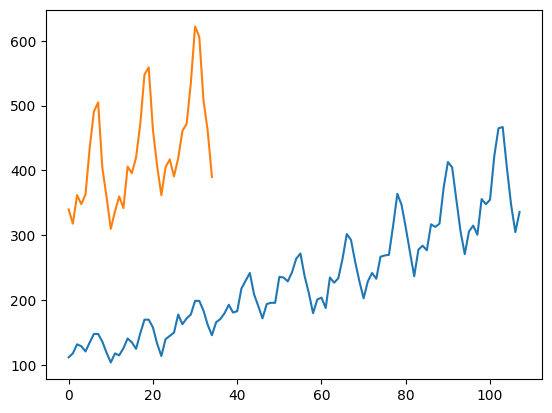

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('airline-passengers.csv')
print(dataset.head())

# Use 75% of data for training, the rest for testing
id_train_cut = int( 0.75 * len(dataset) )

train_set = dataset.iloc[0:id_train_cut,1:2].values
test_set = dataset.iloc[id_train_cut:-1,1:2].values

plt.plot(train_set)
plt.plot(test_set)

print(train_set[0:4].shape)


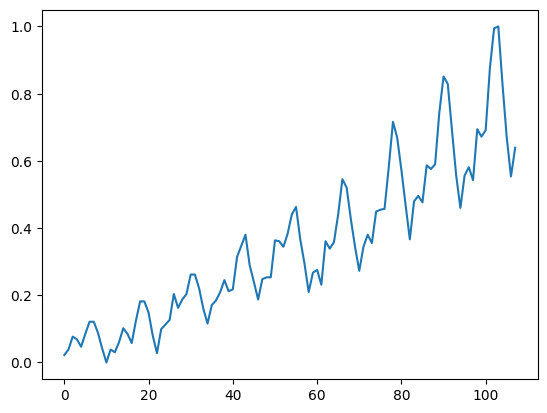

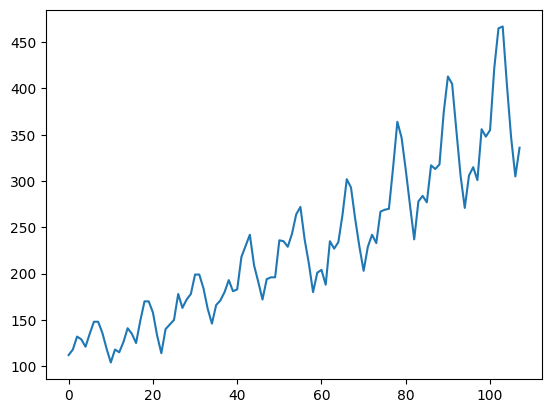

In [ ]:
# Note that the range of data is large. We need to scale it.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_set = scaler.fit_transform(train_set)


plt.plot(train_set)

# Inverse transform 
checkout_train_set = scaler.inverse_transform(train_set)
plt.figure()
plt.plot(checkout_train_set)



In [ ]:
# Prepare data

# Use sliding window to use part of data as input, and next one to predict

def prepare_data (data,sequence_length):
  X = [] # empty list to be filled in
  y = []

  for i in range( len(data)-sequence_length - 1 ):
    Xi = data[i:i+sequence_length]
    yi = data[i+sequence_length]
    
    X.append(Xi)
    y.append(yi)
  
  # Convert list to numpy
  X = np.array(X).astype(np.float32)
  y = np.array(y).astype(np.float32)

  return torch.from_numpy(X), torch.from_numpy(y)

sequence_length = 5

train_X, train_y = prepare_data(train_set,sequence_length)
test_X, test_y = prepare_data(test_set,sequence_length)

print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)


torch.Size([102, 5, 1]) torch.Size([102, 1])
torch.Size([29, 5, 1]) torch.Size([29, 1])


In [ ]:
# Define the model

class SeqModel(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim,num_layers=1):
    super().__init__()

    self.hidden_dim = hidden_dim

    self.lstm = nn.LSTM(input_size=input_dim, 
                        hidden_size=hidden_dim,
                        num_layers=num_layers, 
                        batch_first=True)
    self.fc = nn.Linear(hidden_dim,output_dim)

  def forward(self,input):
    y, (h,c) = self.lstm(input)

    h = h.view(-1,self.hidden_dim)

    #print(h.shape)

    pred = self.fc(h)

    return pred



In [ ]:
# Instantiate the model

# Note that we have input_dim 1, and sequence_length 5
model = SeqModel(input_dim=1,hidden_dim=8,output_dim=1)

pred = model(train_X)

print(pred.shape)


torch.Size([102, 1])


In [ ]:
# Train the model 

num_epochs = 2000
learning_rate = 0.01

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
  pred = model(train_X)

  loss = criterion(pred, train_y)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print("Epoch: ",epoch, ", Loss: ",loss.item())
  


Epoch:  0 , Loss:  0.40542343258857727
Epoch:  100 , Loss:  0.008584802970290184
Epoch:  200 , Loss:  0.006677503697574139
Epoch:  300 , Loss:  0.0047319550067186356
Epoch:  400 , Loss:  0.004005612805485725
Epoch:  500 , Loss:  0.0038408953696489334
Epoch:  600 , Loss:  0.003774922341108322
Epoch:  700 , Loss:  0.0037162303924560547
Epoch:  800 , Loss:  0.003652626881375909
Epoch:  900 , Loss:  0.0035711282398551702
Epoch:  1000 , Loss:  0.003533442271873355
Epoch:  1100 , Loss:  0.003461443819105625
Epoch:  1200 , Loss:  0.0035186430905014277
Epoch:  1300 , Loss:  0.003334254026412964
Epoch:  1400 , Loss:  0.0031993656884878874
Epoch:  1500 , Loss:  0.0031093095894902945
Epoch:  1600 , Loss:  0.0028297186363488436
Epoch:  1700 , Loss:  0.0027287008706480265
Epoch:  1800 , Loss:  0.0021794303320348263
Epoch:  1900 , Loss:  0.00207536481320858


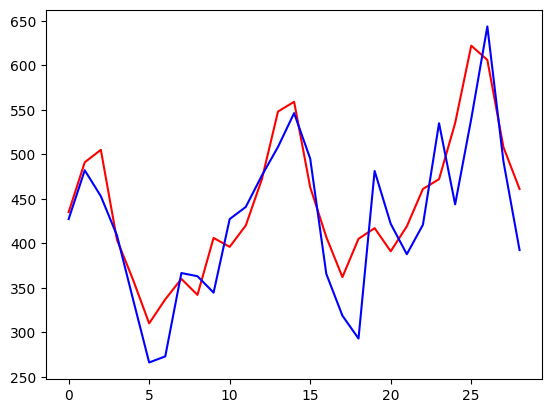

In [ ]:
# Test the model

model.eval()

test_X, test_y = prepare_data(test_set,sequence_length) 

test_set_sc = scaler.transform(test_set)
test_X_sc, test_y_sc = prepare_data(test_set_sc,sequence_length) 

pred_sc = model(test_X_sc).detach()
pred = scaler.inverse_transform(pred_sc)

plt.plot(test_y,'r')
plt.plot(pred,'b')
